https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs

# Requirements:
###librosa:
A Python library for analyzing audio signals, useful for tasks like feature extraction from audio files.
### numba :
A JIT (Just-In-Time) compiler for Python, often used to speed up numerical computations.

In [ ]:
!pip3 install librosa
!pip3 install numba>=0.53


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "/content/drive/My Drive/ProjectsData/dog_barking_7.wav"
x , sr = librosa.load(audio_data,duration=5.0)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(98368,) 22050


resample to 44KHZ, 44.1 kHz is a widely used standard sample rate for audio CDs and many digital audio applications. Using this rate ensures compatibility with a wide range of tools and systems.

In [ ]:
# librosa.load(audio_data, sr=44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

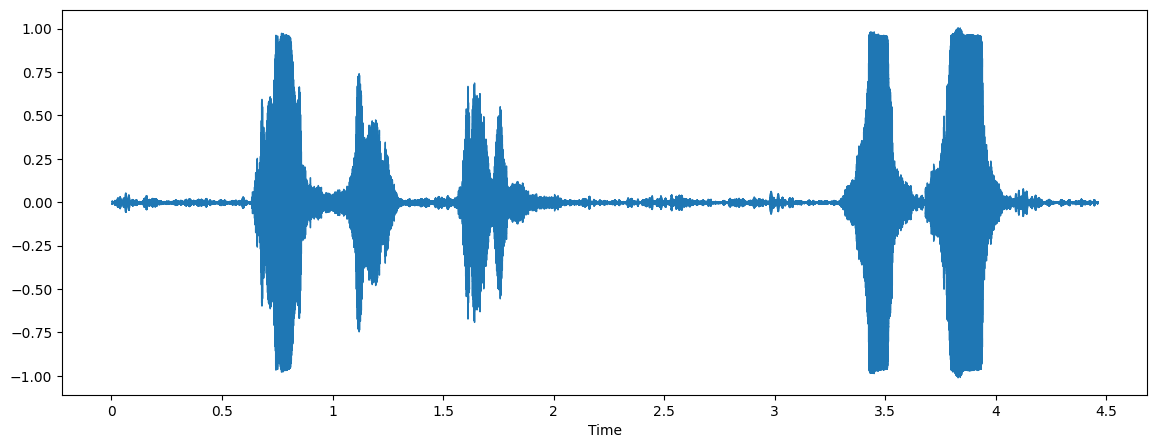

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

Chroma features are a way of representing sound based on musical notes (like the notes on a piano). There are 12 notes in music: C, C#, D, D#, E, F, F#, G, G#, A, A#, and B.

A filter bank is like a set of musical ears that can listen to different parts of a sound. It breaks down the sound into different frequency (or pitch) ranges, and each "filter" listens for specific pitches.



```
librosa.filters.chroma():

This function creates filters that listen for the 12 different musical notes (C, C#, D, etc.) in the sound.
12 rows: Each row corresponds to one of the 12 notes (C, C#, D, D#, E, etc.).
Many columns: Each column represents a small slice of the sound’s frequency. Each number in the matrix shows how much a particular note (like C or D) contributes to that slice of the sound.

```

sr=22050:

This is the sampling rate. It tells us how many times per second the sound was recorded. A common rate for music is 22,050 times per second (22,050 Hz). This is fast enough to capture the frequencies we hear in music.

n_fft=4096 argument specifies the number of FFT (Fast Fourier Transform) bins to use. The FFT is a mathematical algorithm that transforms a signal from the time domain to the frequency domain, essentially breaking it down into its constituent frequencies.

In [ ]:
# Build a simple chroma filter bank
chromafb = librosa.filters.chroma(sr=22050, n_fft=4096)

chromafb

array([[1.70601543e-05, 2.82992725e-04, 1.03555294e-03, ...,
        5.23030704e-21, 4.43047226e-21, 3.75236833e-21],
       [1.66987356e-05, 3.18591396e-04, 1.46405352e-03, ...,
        1.25662976e-13, 1.10109757e-13, 9.64649842e-14],
       [1.61444223e-05, 3.48842266e-04, 1.90847355e-03, ...,
        5.52980168e-08, 5.01214537e-08, 4.54209257e-08],
       ...,
       [1.68931711e-05, 3.02419503e-04, 1.25730084e-03, ...,
        4.03871397e-17, 4.63902409e-17, 5.32694454e-17],
       [1.71591892e-05, 2.65152019e-04, 8.56101280e-04, ...,
        2.25072222e-25, 2.67424414e-25, 3.17644285e-25],
       [1.72155414e-05, 2.44485302e-04, 6.75355259e-04, ...,
        3.98721026e-30, 3.26509862e-30, 2.67339596e-30]], dtype=float32)

n_chroma=24:

This is where things change from the default. The standard chroma filter bank has 12 bins (one for each musical note: C, C#, D, D#, etc.).
By setting n_chroma=24, you're doubling the number of chroma bins. This means you're dividing each musical note (C, C#, D, etc.) into two parts (called semitone bins), giving you more detailed information about pitch.

In [ ]:
# Use quarter-tones instead of semitones
librosa.filters.chroma(sr=22050, n_fft=4096, n_chroma=24)

array([[1.2062923e-05, 2.0009540e-04, 7.3222251e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1952894e-05, 2.1304651e-04, 8.7951310e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1807369e-05, 2.2526611e-04, 1.0352081e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.2171624e-05, 1.7373025e-04, 4.8452709e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2172794e-05, 1.7286799e-04, 4.7753262e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2136448e-05, 1.8663100e-04, 5.9735152e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
# Equally weight all octaves
librosa.filters.chroma(sr=22050, n_fft=4096, octwidth=None)

array([[3.06632757e-01, 2.43654341e-01, 1.60742402e-01, ...,
        2.75466492e-20, 2.33491276e-20, 1.97881458e-20],
       [3.00136745e-01, 2.74304509e-01, 2.27255851e-01, ...,
        6.61833761e-13, 5.80291837e-13, 5.08708906e-13],
       [2.90173739e-01, 3.00350249e-01, 2.96240419e-01, ...,
        2.91240070e-07, 2.64146166e-07, 2.39527623e-07],
       ...,
       [3.03631455e-01, 2.60380656e-01, 1.95162937e-01, ...,
        2.12708409e-16, 2.44482217e-16, 2.80916862e-16],
       [3.08412760e-01, 2.28293657e-01, 1.32887244e-01, ...,
        1.18539604e-24, 1.40935927e-24, 1.67509979e-24],
       [3.09425622e-01, 2.10499778e-01, 1.04831174e-01, ...,
        2.09995848e-29, 1.72074678e-29, 1.40981758e-29]], dtype=float32)

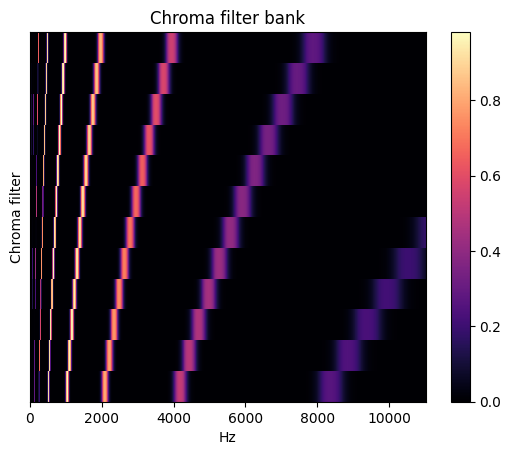

In [ ]:
#https://librosa.org/doc-playground/main/generated/librosa.filters.chroma.html?highlight=chroma#librosa.filters.chroma
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
ax.set(ylabel='Chroma filter', title='Chroma filter bank')
fig.colorbar(img, ax=ax)




```
The librosa.feature.chroma_cqt() function:

Extracts chroma features using the Constant-Q Transform (CQT), which is particularly useful for musical analysis.
```



y=x: The audio signal x is provided. The y here refers to the input signal.

sr=sr: The sampling rate (sr) is passed in to
ensure the audio is processed at the correct speed.

hop_length=hop_length: This controls how often the chroma features are calculated along the time axis.



```
The result, x_chroma, is a 2D array where:

The rows represent the 12 pitch classes (C, C#, D, etc.).
The columns represent the chroma values at different points in time.
```



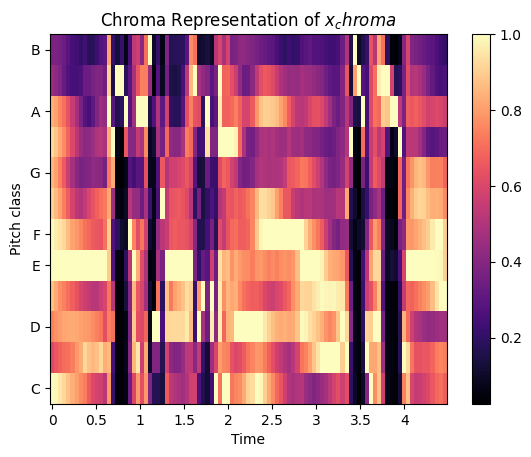

In [ ]:
# Extract Chroma Features

hop_length = 1024

x_chroma = librosa.feature.chroma_cqt(y=x, sr=sr,
                                         hop_length=hop_length)

fig, ax = plt.subplots(nrows=1, sharey=True)
img = librosa.display.specshow(x_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax)
ax.set(title='Chroma Representation of $x_chroma$')
fig.colorbar(img, ax=ax)

calculates the chroma features of an audio signal using a Short-Time Fourier Transform (STFT) and returns them as a NumPy array.

In [ ]:
librosa.feature.chroma_stft(y=x, sr=sr)

array([[0.50638455, 0.6695047 , 0.7345517 , ..., 0.3871219 , 0.41699988,
        0.5266974 ],
       [0.48598835, 0.5856415 , 0.56666714, ..., 0.51881254, 0.49125722,
        0.56453276],
       [0.59213233, 0.6060558 , 0.42857876, ..., 0.72205704, 0.6536944 ,
        0.6503293 ],
       ...,
       [0.8914082 , 0.93762565, 0.9879264 , ..., 0.52147496, 0.7801718 ,
        0.87284154],
       [0.7504479 , 0.8075802 , 0.8848564 , ..., 0.3821313 , 0.5219821 ,
        0.6511609 ],
       [0.60301745, 0.7449822 , 0.8331232 , ..., 0.34130165, 0.42327675,
        0.55272037]], dtype=float32)

### Power Spectrogram vs. Magnitude Spectrogram:

Power spectrogram: Represents the energy distribution of the audio signal across frequencies.
Magnitude spectrogram: Represents the amplitude of the frequencies in the signal. It's like the power spectrogram but without squaring the values.

In [ ]:
# Use an energy (magnitude) spectrum instead of power spectrogram
S = np.abs(librosa.stft(x))   # Calculates the STFT of the audio signal (x) and takes the absolute value to get the magnitude spectrogram.
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.56714135, 0.6280403 , 0.8115597 , ..., 0.6514499 , 0.6517683 ,
        0.50690204],
       [0.56424344, 0.5922887 , 0.7987365 , ..., 0.73883206, 0.6521361 ,
        0.5582192 ],
       [0.6498298 , 0.61836994, 0.6856798 , ..., 0.74608016, 0.63993484,
        0.59252524],
       ...,
       [0.8477596 , 0.7614523 , 0.80406696, ..., 0.83351034, 0.91462123,
        1.        ],
       [0.7592614 , 0.6304301 , 0.6961797 , ..., 0.6895892 , 0.6955672 ,
        0.7353282 ],
       [0.6559487 , 0.5897691 , 0.684126  , ..., 0.555289  , 0.5763733 ,
        0.54035383]], dtype=float32)

Larger Frame (n_fft=4096):

The n_fft parameter controls the frame size of the STFT. A larger frame size (4096 in this case) means you're analyzing a longer segment of audio at once.
Effect: Larger frames generally lead to better frequency resolution (finer details in the frequency domain) but poorer time resolution (less precise timing information).

In [ ]:
# Use a pre-computed power spectrogram with a larger frame
S = np.abs(librosa.stft(x, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.52425086, 0.39287004, 0.31215706, ..., 0.43943328, 0.28363156,
        0.2788008 ],
       [0.38978505, 0.3001424 , 0.28975758, ..., 0.5448729 , 0.4042798 ,
        0.37998787],
       [0.33190513, 0.25225642, 0.39355403, ..., 0.7219944 , 0.6112674 ,
        0.49203   ],
       ...,
       [0.95102084, 0.9227145 , 0.7757305 , ..., 0.55932325, 0.33216363,
        0.542874  ],
       [0.75711894, 0.6713358 , 0.41937834, ..., 0.67350703, 0.20730156,
        0.30044866],
       [0.60256255, 0.48705867, 0.31219095, ..., 0.5416566 , 0.19164471,
        0.22134177]], dtype=float32)

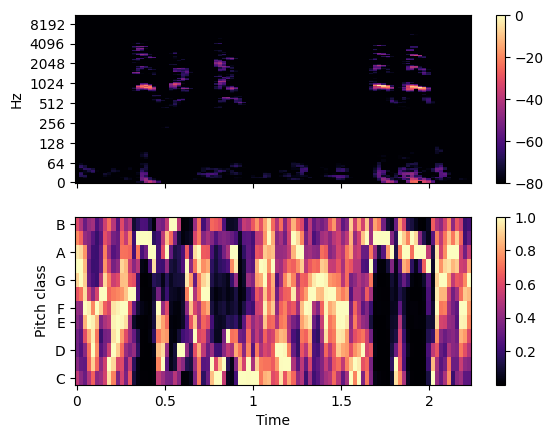

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

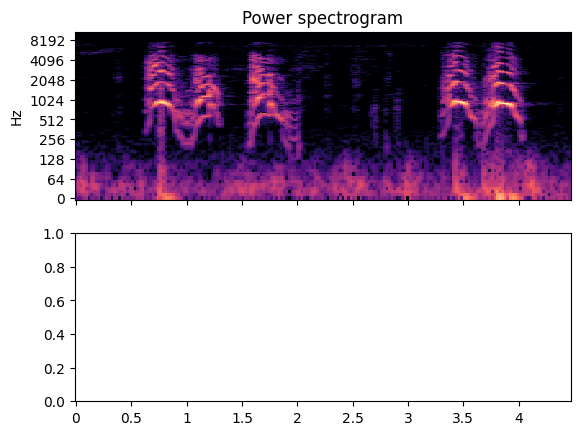

In [ ]:

D = np.abs(librosa.stft(x))  #takes the absolute value to get the magnitude spectrogram.
times = librosa.times_like(D) #his creates a time axis (times) that corresponds to the time dimension of the spectrogram (D).
fig, ax = plt.subplots(nrows=2, sharex=True) #This creates a figure with two subplots, sharing the same x-axis (time).
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])#This displays the power spectrogram (converted to decibels) on the first subplot (ax[0]).
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

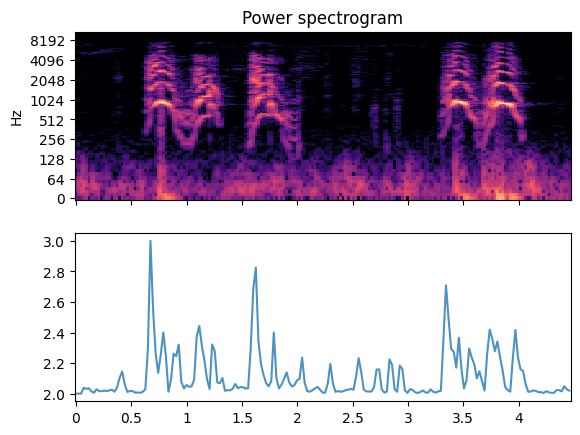

In [ ]:

D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
onset_env = librosa.onset.onset_strength(y=x, sr=sr)
ax[1].plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,
           label='Mean (mel)')

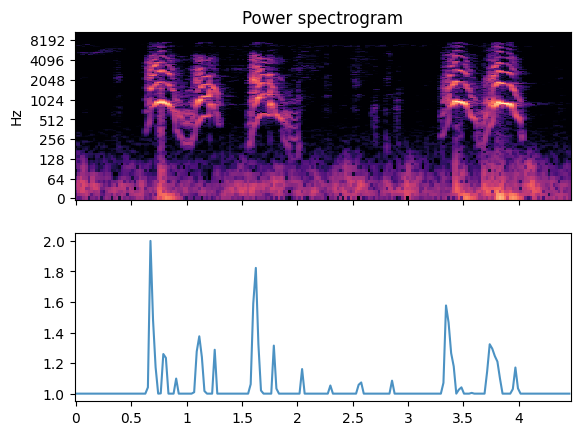

In [ ]:
# Median aggregation, and custom mel options
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

onset_env = librosa.onset.onset_strength(y=x, sr=sr,
                                         aggregate=np.median,
                                         fmax=8000, n_mels=256)
ax[1].plot(times, 1 + onset_env / onset_env.max(), alpha=0.8,
           label='Median (custom mel)')


[Text(0, 0.5, 'Normalized strength'), []]

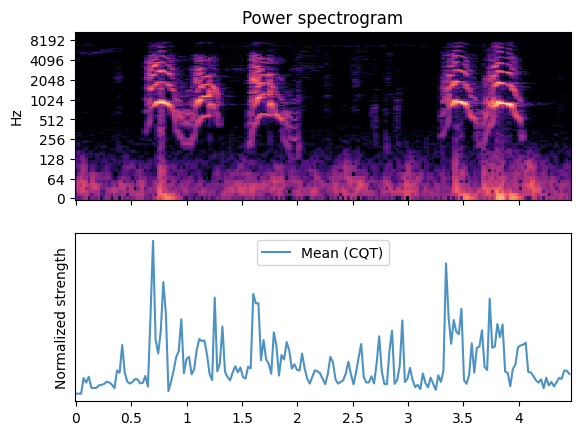

In [ ]:
# Constant-Q spectrogram instead of Mel

# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()


C = np.abs(librosa.cqt(y=x, sr=sr))
onset_env = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref=np.max))
ax[1].plot(times, onset_env / onset_env.max(), alpha=0.8,
         label='Mean (CQT)')
ax[1].legend()
ax[1].set(ylabel='Normalized strength', yticks=[])


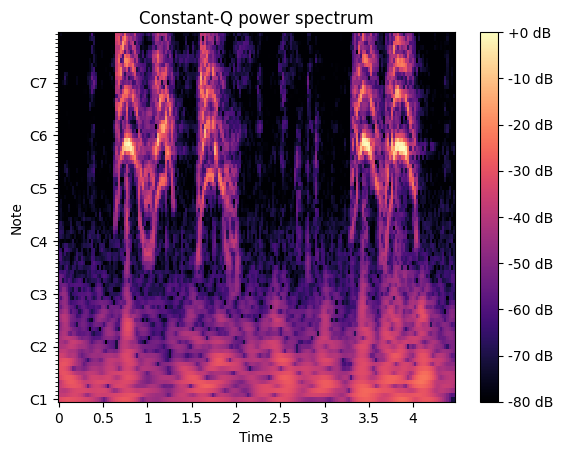

In [ ]:
C = np.abs(librosa.cqt(x, sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

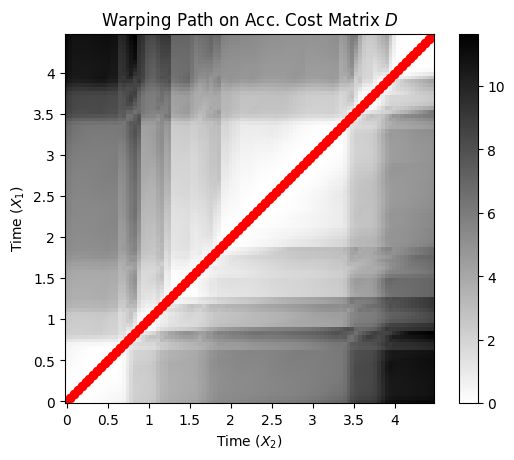

In [ ]:
D, wp = librosa.sequence.dtw(X=x_chroma,Y=x_chroma, metric='cosine')
wp_s = librosa.frames_to_time(wp, sr=sr, hop_length=hop_length)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=sr,
                               cmap='gray_r', hop_length=hop_length, ax=ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax.set(title='Warping Path on Acc. Cost Matrix $D$',
       xlabel='Time $(X_2)$', ylabel='Time $(X_1)$')
fig.colorbar(img, ax=ax)


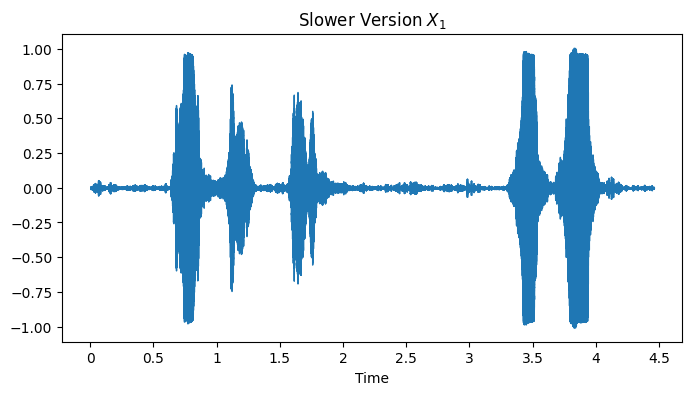

In [ ]:
#Alternative Visualization in the Time Domain
fig, ax1 = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(8, 4))

# Plot x_1
librosa.display.waveshow(x, sr=sr, ax=ax1)
ax1.set(title='Slower Version $X_1$')
ax1.label_outer()


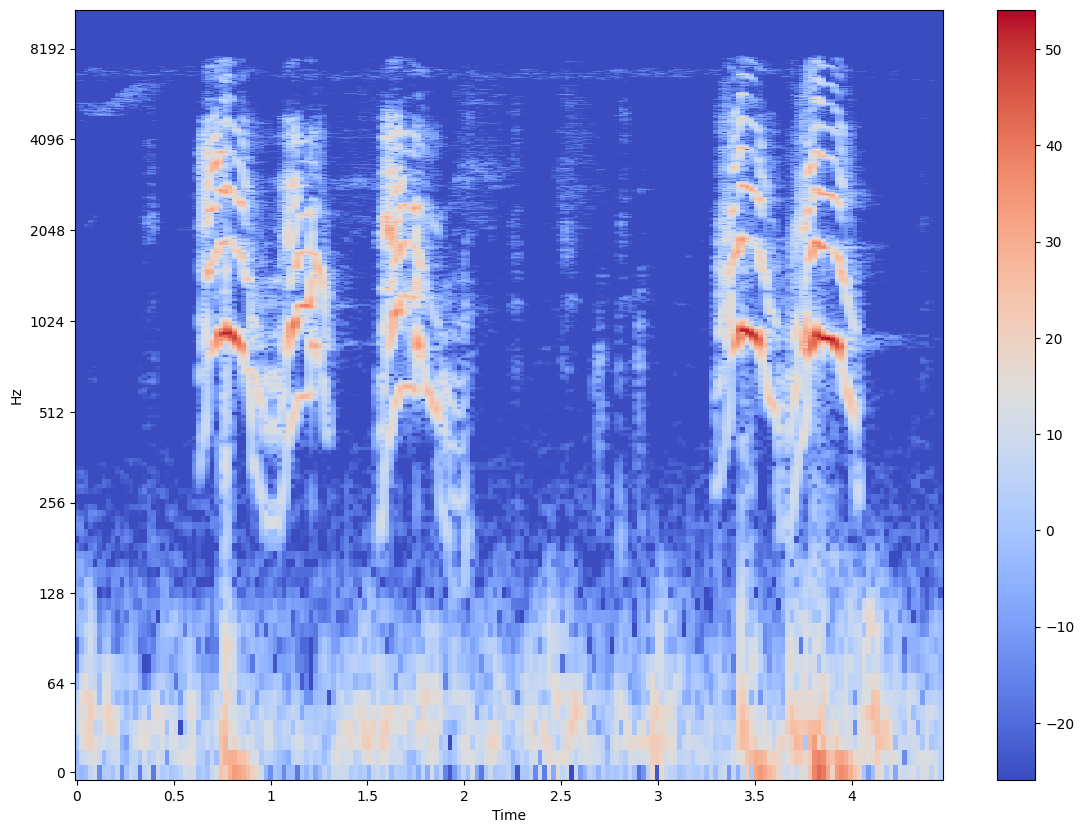

In [ ]:
# Spectrogram
import matplotlib.pyplot as plt
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 10))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
X

array([[ 8.63694608e-01+0.0000000e+00j, -6.32693172e-01+0.0000000e+00j,
        -7.86267936e-01+0.0000000e+00j, ...,
        -1.83976996e+00+0.0000000e+00j, -4.25020456e+00+0.0000000e+00j,
        -1.74984193e+00+0.0000000e+00j],
       [-3.41070406e-02+6.5117329e-01j, -1.16142964e+00-2.2626452e+00j,
         2.29527235e+00+2.2690928e+00j, ...,
         2.08583879e+00-2.9521713e+00j,  3.29423308e+00+6.3028514e-01j,
         2.43739769e-01+1.8255048e+00j],
       [-6.45266950e-01+8.8875890e-01j,  4.76275969e+00+2.2661303e-01j,
        -7.69357634e+00-5.1713209e+00j, ...,
        -1.10703611e+00+2.6404386e-02j, -1.41446614e+00+8.6055912e-02j,
         1.33328474e+00-1.1567972e+00j],
       ...,
       [ 1.84599165e-04-2.1571550e-06j, -9.17941943e-05+1.0954036e-06j,
         8.67424603e-08+6.1620440e-08j, ...,
         2.54945598e-09+1.0526970e-08j,  5.09818674e-05+2.1333959e-05j,
        -1.25718696e-04-5.2609761e-05j],
       [-1.84573961e-04+1.0777825e-06j,  5.39329676e-07+9.1693575e-0

In [ ]:
Xdb

array([[ -1.2727958,  -3.9761372,  -2.0885887, ...,   5.295271 ,
         12.568197 ,   4.859977 ],
       [ -3.71417  ,   8.108024 ,  10.17745  , ...,  11.16144  ,
         10.511228 ,   5.304401 ],
       [  0.8144156,  13.566995 ,  19.341633 , ...,   0.8857056,
          3.0278971,   4.9357347],
       ...,
       [-25.89729  , -25.89729  , -25.89729  , ..., -25.89729  ,
        -25.89729  , -25.89729  ],
       [-25.89729  , -25.89729  , -25.89729  , ..., -25.89729  ,
        -25.89729  , -25.89729  ],
       [-25.89729  , -25.89729  , -25.89729  , ..., -25.89729  ,
        -25.89729  , -25.89729  ]], dtype=float32)

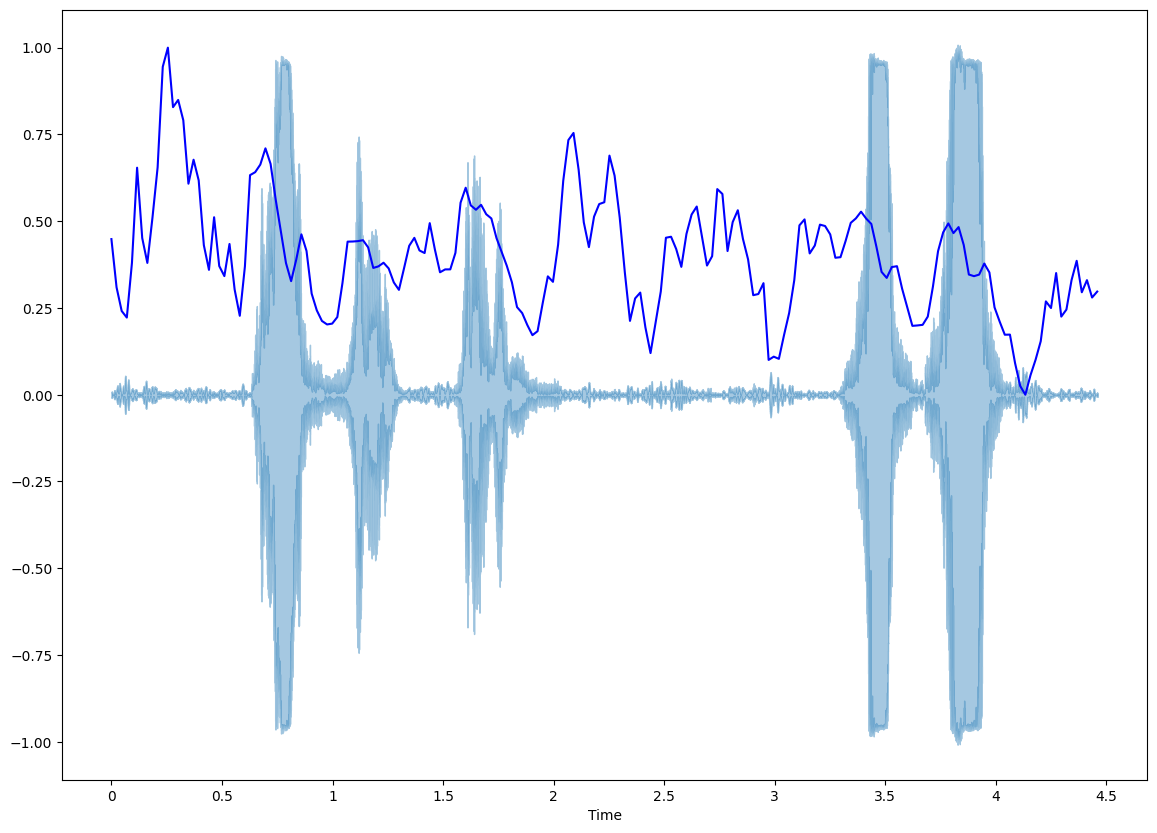

In [ ]:
# Spectral Centroid
import sklearn
from sklearn import preprocessing


spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
plt.figure(figsize=(14, 10))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

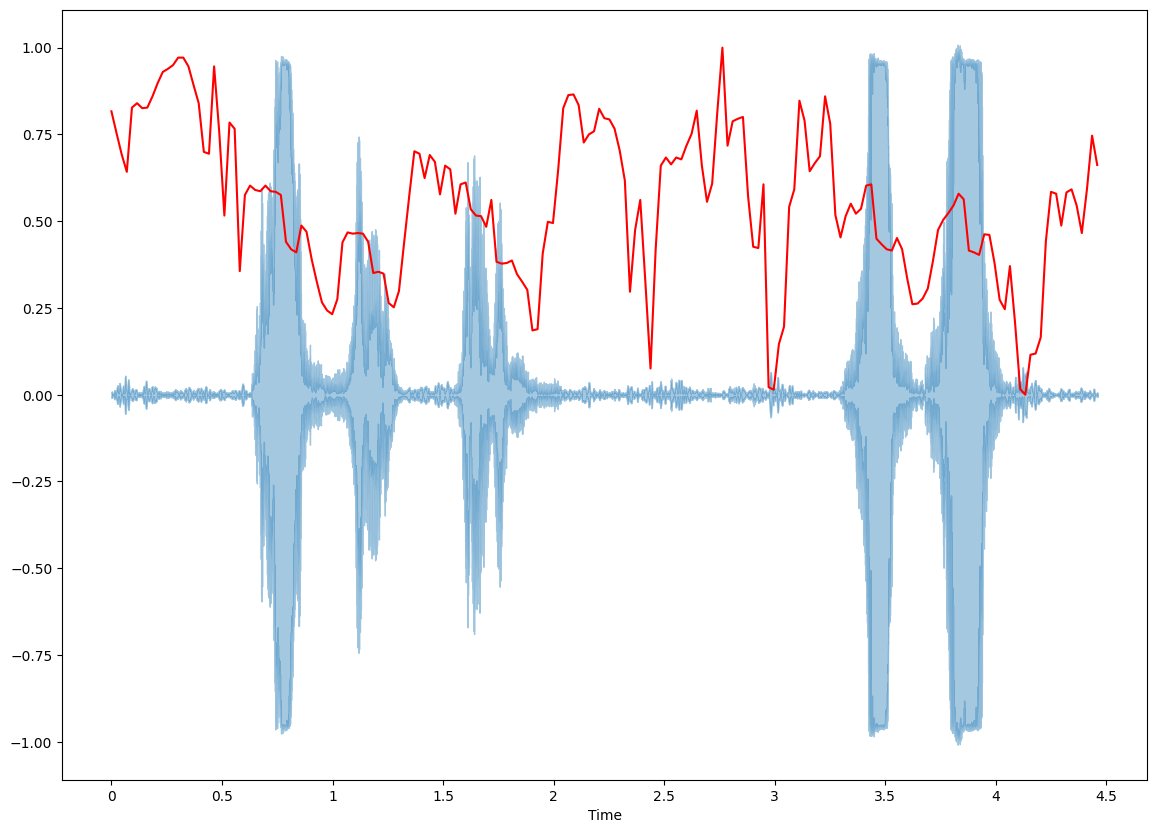

In [ ]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(14, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

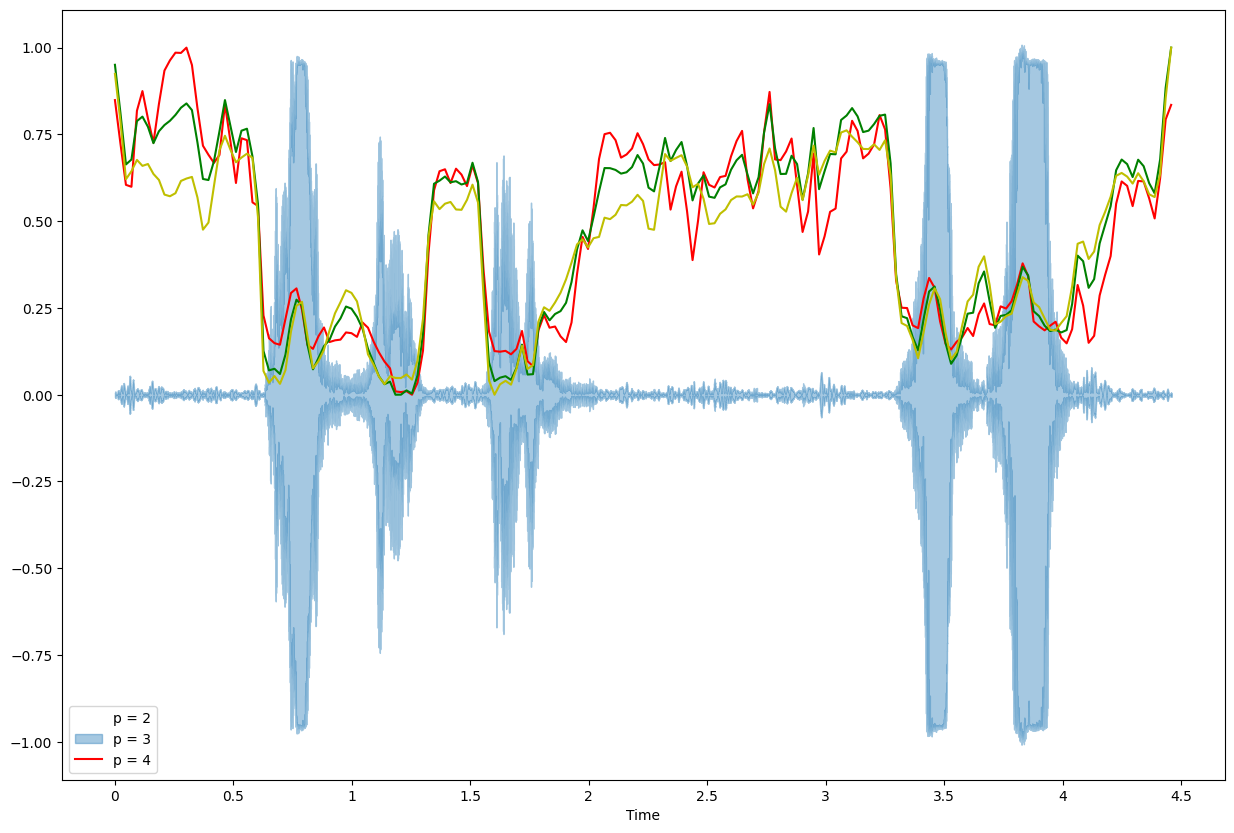

In [ ]:
# Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

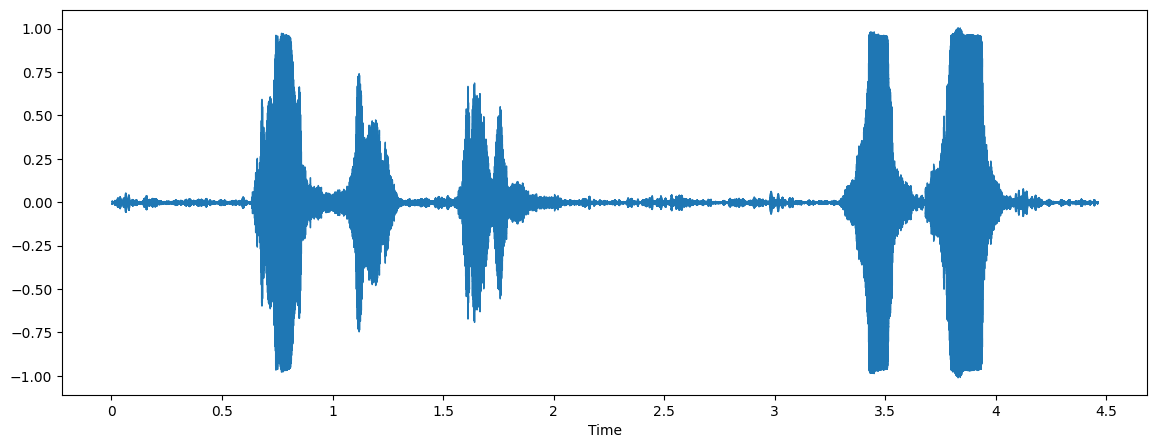

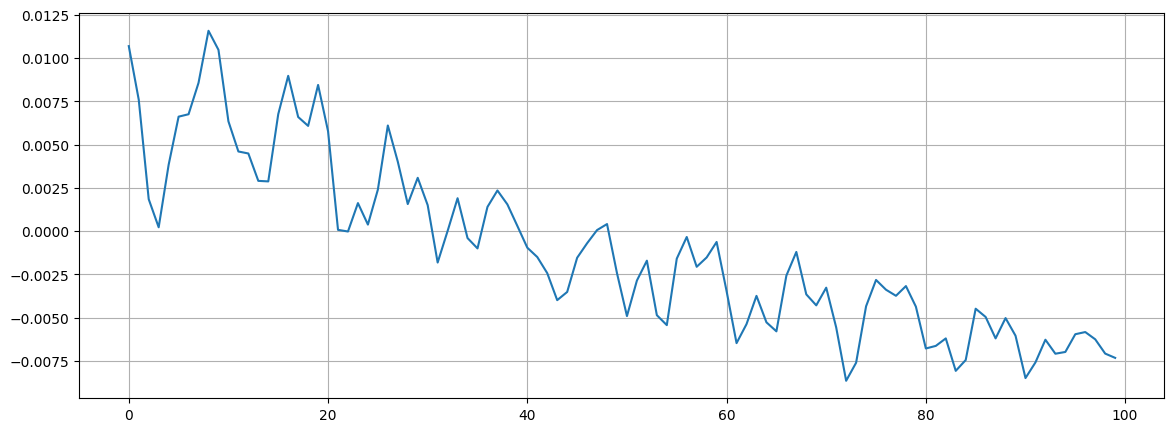

In [ ]:
# Zero-Crossing Rate
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

9


(20, 193)


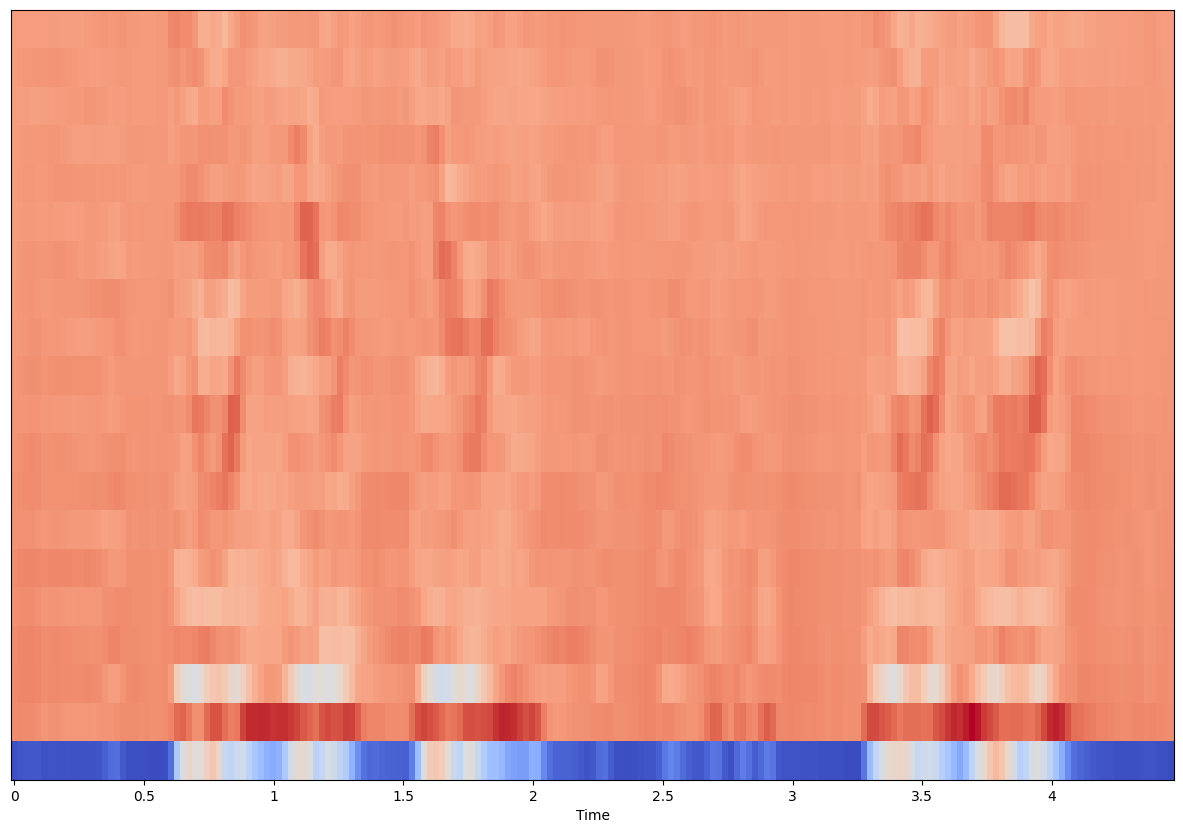

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
mfccs

array([[-417.43433   , -412.01303   , -409.78326   , ..., -417.87595   ,
        -420.07968   , -422.26306   ],
       [  26.044022  ,   27.995785  ,   26.77928   , ...,   28.372927  ,
          26.455523  ,   23.431774  ],
       [  28.371508  ,   33.619625  ,   33.513584  , ...,   25.289093  ,
          25.291485  ,   22.370659  ],
       ...,
       [   0.97532403,    3.018772  ,    2.284995  , ...,    5.4278936 ,
           3.9149895 ,    4.203309  ],
       [   2.0637972 ,    7.1357365 ,   11.011555  , ...,    5.8271723 ,
           2.9835272 ,    2.8606691 ],
       [   1.0744598 ,    2.1841247 ,    2.21703   , ...,    5.24014   ,
           2.4413002 ,    1.9442501 ]], dtype=float32)

In [ ]:
librosa.load(audio_data, sr=44100)

(array([0.00213076, 0.00368439, 0.00449798, ..., 0.00077501, 0.00056301,
        0.00026635], dtype=float32),
 44100)

In [ ]:
ipd.Audio(audio_data)

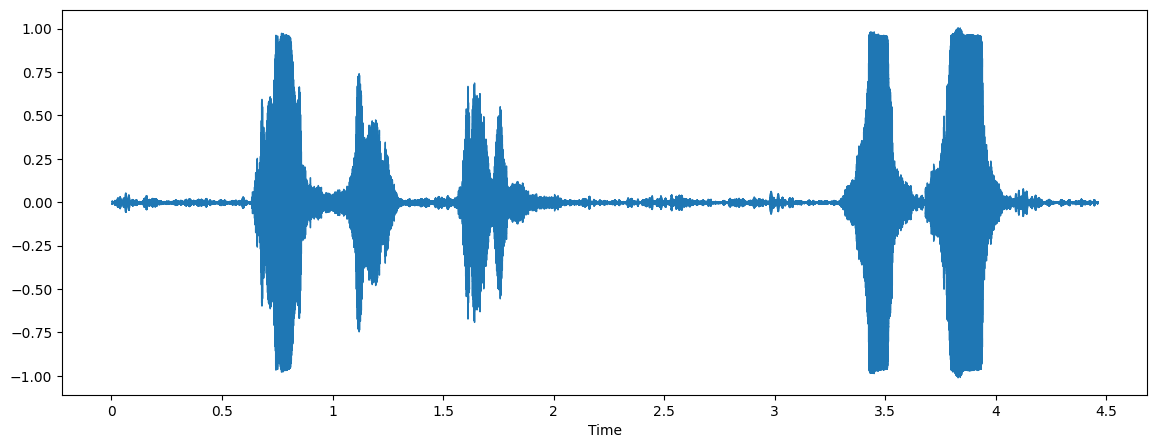

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

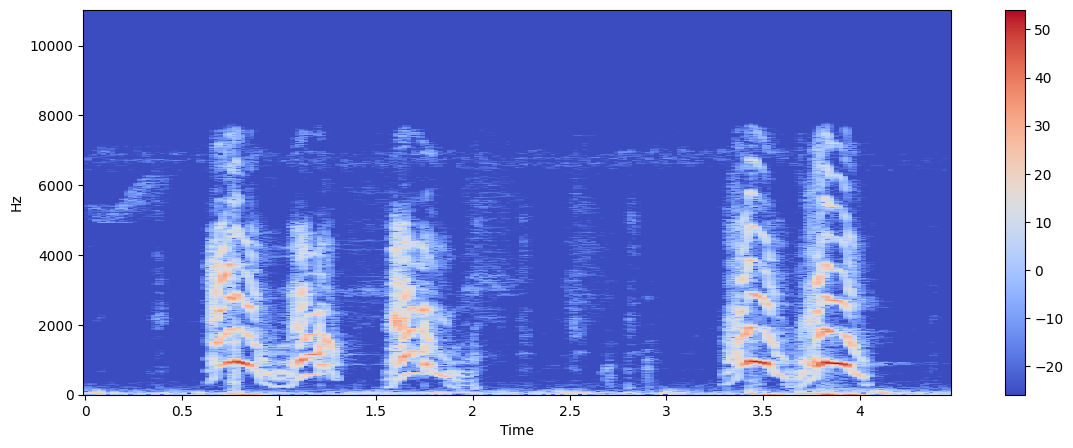

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

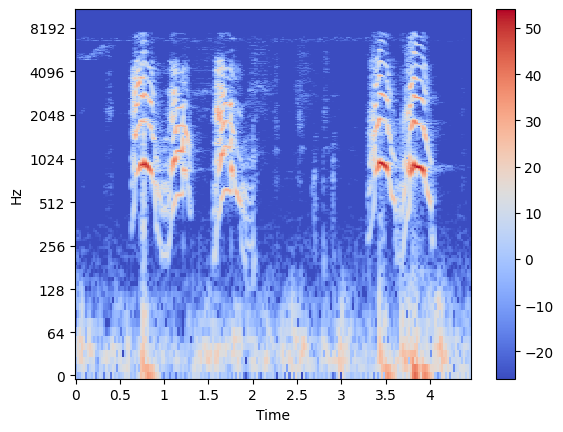

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
# (775,)
# # Computing the time variable for visualization
# plt.figure(figsize=(12, 4))frames = range(len(spectral_centroids))
# t = librosa.frames_to_time(frames)
# # Normalising the spectral centroid for visualisation
# def normalize(x, axis=0):
#     return sklearn.preprocessing.minmax_scale(x, axis=axis)
# #Plotting the Spectral Centroid along the waveform
# librosa.display.waveplot(x, sr=sr, alpha=0.4)
# plt.plot(t, normalize(spectral_centroids), color='b')

(193,)

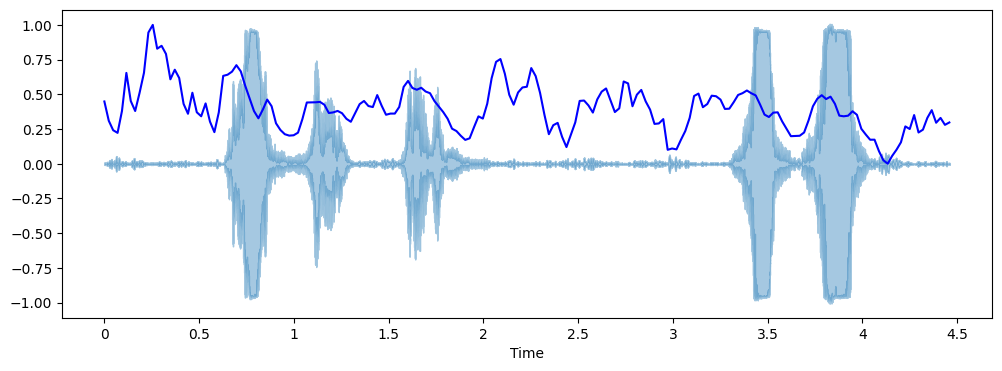

In [ ]:
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

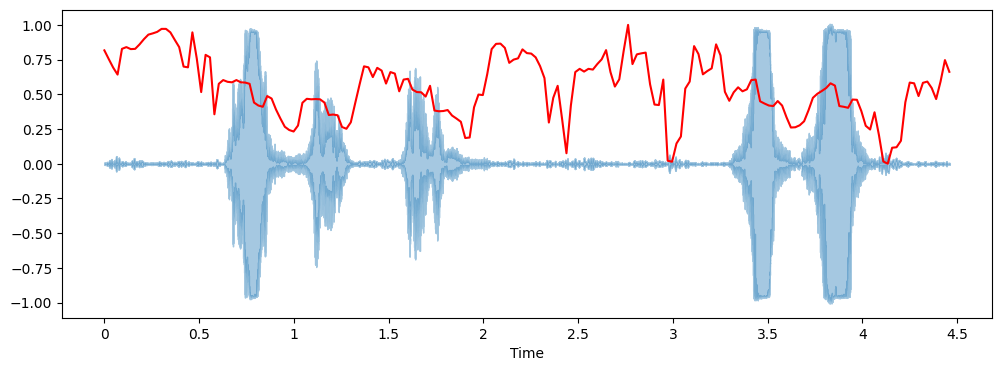

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

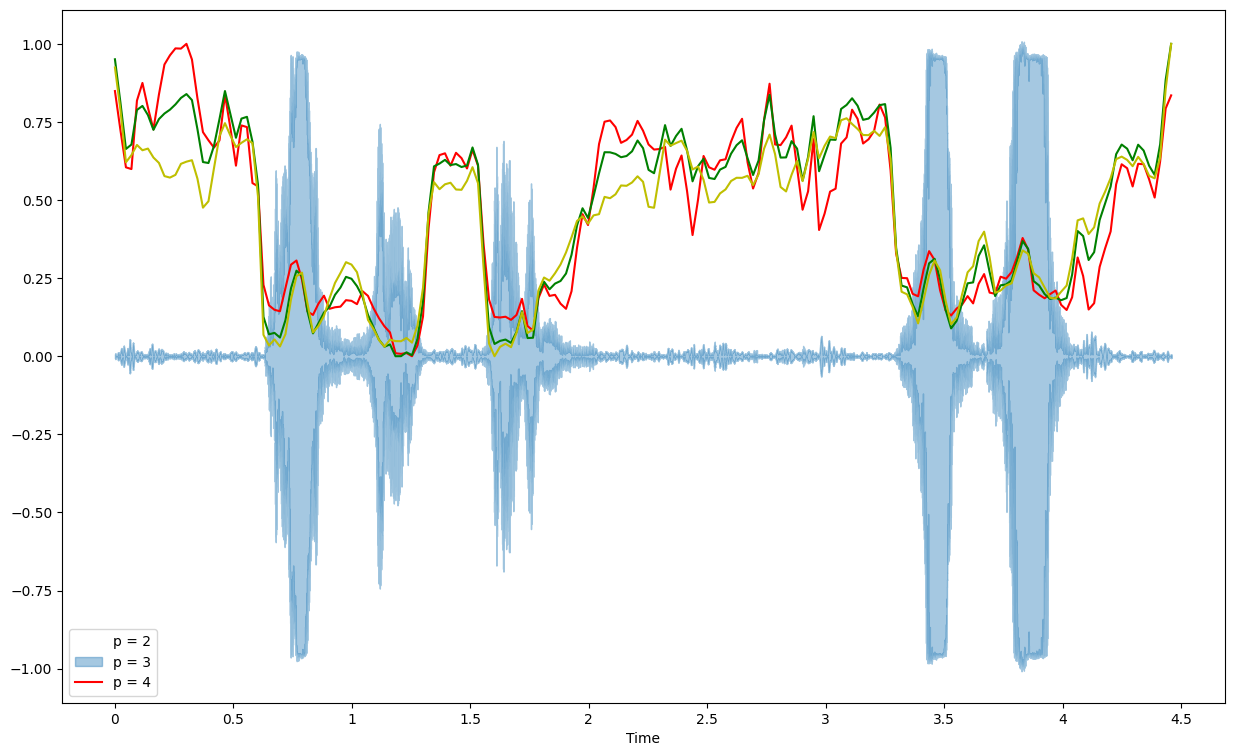

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)


(20, 193)


In [ ]:
mfccs

array([[-417.43433   , -412.01303   , -409.78326   , ..., -417.87595   ,
        -420.07968   , -422.26306   ],
       [  26.044022  ,   27.995785  ,   26.77928   , ...,   28.372927  ,
          26.455523  ,   23.431774  ],
       [  28.371508  ,   33.619625  ,   33.513584  , ...,   25.289093  ,
          25.291485  ,   22.370659  ],
       ...,
       [   0.97532403,    3.018772  ,    2.284995  , ...,    5.4278936 ,
           3.9149895 ,    4.203309  ],
       [   2.0637972 ,    7.1357365 ,   11.011555  , ...,    5.8271723 ,
           2.9835272 ,    2.8606691 ],
       [   1.0744598 ,    2.1841247 ,    2.21703   , ...,    5.24014   ,
           2.4413002 ,    1.9442501 ]], dtype=float32)

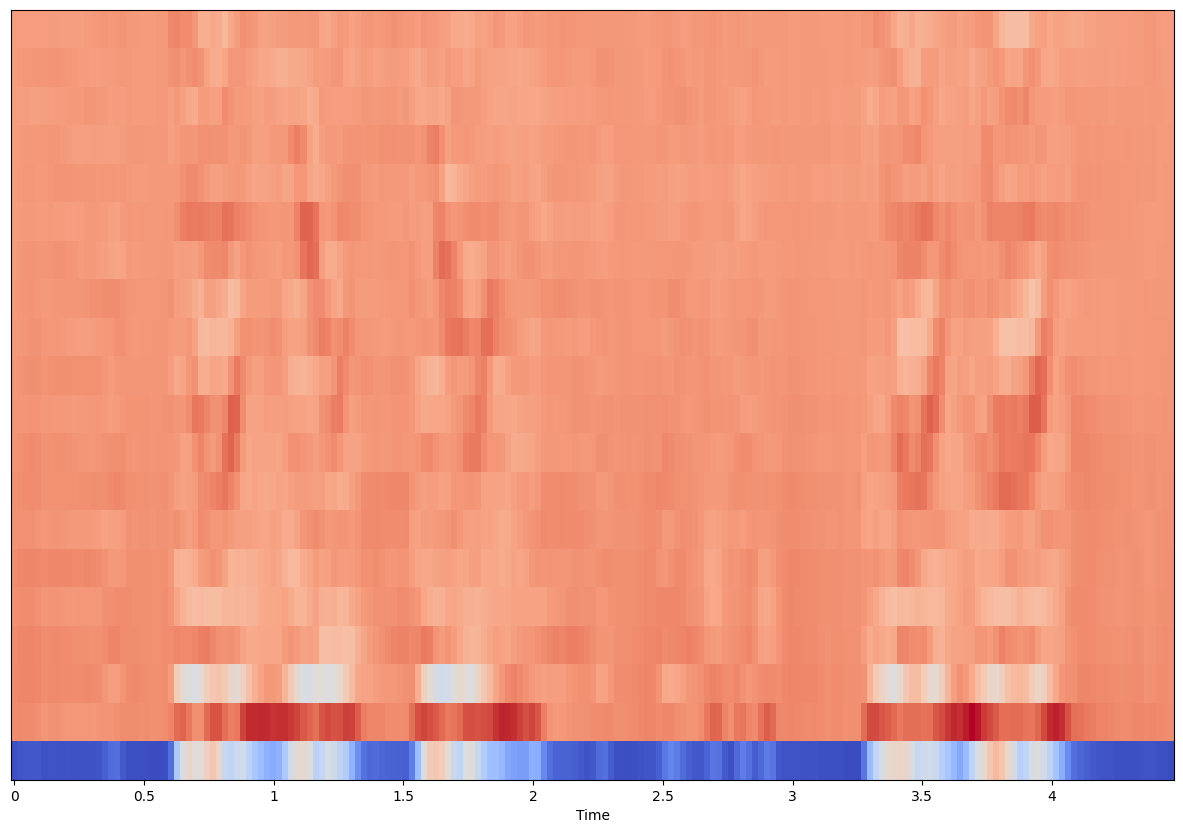

In [ ]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')